In [66]:
#delete these first 2 lines before running, they are only needed on my PC
import sys
sys.path.append("/miniconda3/lib/python3.7/site-packages") 

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in square
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in square
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in square


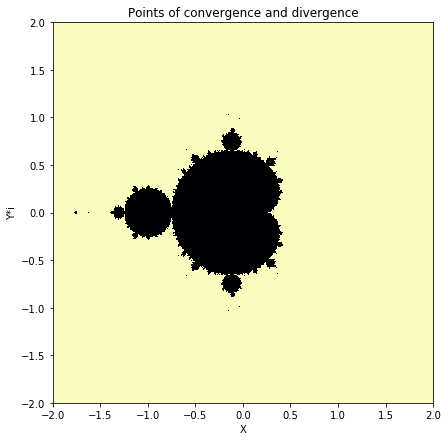

In [88]:
#Q1 part 1
x=np.linspace(-2,2,1000)
y=np.linspace(-2,2,1000)
X,Y=np.meshgrid(x,y)

z=0
C=X+Y*1j

#passes through 100 iterations of the sequence, saving the values that diverge into an array
for i in range(100):
    z = z**2+C
    divergent = np.isnan(z)

#plotting 
fig, ax = plt.subplots(figsize=(10,7))
ax.imshow(divergent, extent=[-2,2,-2,2],cmap='magma',vmin=0,vmax=1)
plt.xlabel("X")
plt.ylabel("Y*i")
plt.title("Points of convergence and divergence")
plt.savefig("q11")


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in square
  if sys.path[0] == '':


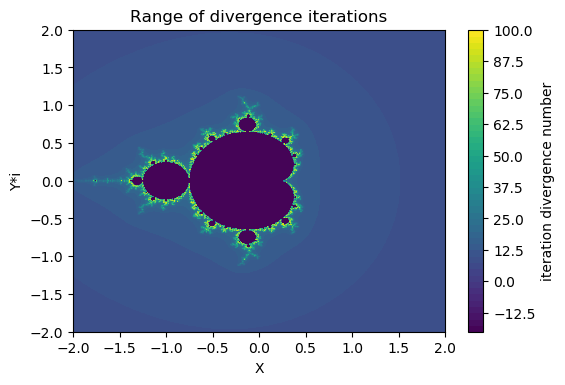

<Figure size 432x288 with 0 Axes>

In [91]:
#Q1 part 2
x = np.linspace(-2,2,1000)
y = np.linspace(-2,2,1000)
X,Y = np.meshgrid(x,y)

z=0
C = X+Y*1j

#passes through up to 100 iterations of the sequence to save each point of divergence
iteration = np.zeros_like(C).astype(int)
for i in range(100):
    z = z**2 + C
    iteration += np.isfinite(z)

#for cases where divergence does not occur within 100 iterations, value is set to -20 to 
#create contrast in the colourmap
iteration = np.where(iteration == 100,-20,iteration)

#plotting
plt.figure(dpi=100)
plt.contourf(X,Y,iteration,levels=50)
plt.colorbar(label="iteration divergence number")
plt.xlabel("X")
plt.ylabel("Y*i")
plt.title("Range of divergence iterations")
plt.show()
plt.savefig("q12")

In [68]:
#Q2

#defining the derivative functions of the model
def SIR_model(y,t,beta,gamma):
    S,I,R=y
    
    dS_dt=-beta*S*I*(1/1000)
    dI_dt=beta*S*I*(1/1000)-gamma*I
    dR_dt=gamma*I
    
    return([dS_dt,dI_dt,dR_dt])

S0=999
I0=1
R0=0

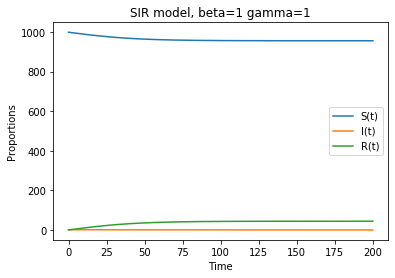

<Figure size 432x288 with 0 Axes>

In [69]:
#first set of beta and gamma
beta=1
gamma=1

t= np.linspace(0,200,10000)

#odeint used to integrate functions
solution = odeint(SIR_model,[S0,I0,R0],t,args=(beta,gamma))
solution = np.array(solution)

#plotting
plt.plot(t,solution[:,0], label="S(t)")
plt.plot(t,solution[:,1], label="I(t)")
plt.plot(t,solution[:,2], label="R(t)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SIR model, beta=1 gamma=1")
plt.show()
plt.savefig("q21")

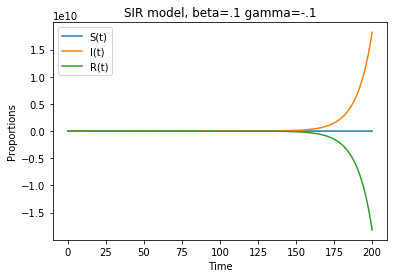

<Figure size 432x288 with 0 Axes>

In [86]:
#second set of beta and gamma
beta=.1
gamma=-.1

t= np.linspace(0,200,10000)

#odeint used to integrate functions
solution = odeint(SIR_model,[S0,I0,R0],t,args=(beta,gamma))
solution = np.array(solution)

#plotting
plt.plot(t,solution[:,0], label="S(t)")
plt.plot(t,solution[:,1], label="I(t)")
plt.plot(t,solution[:,2], label="R(t)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SIR model, beta=.1 gamma=-.1")
plt.show()
plt.savefig("q22")

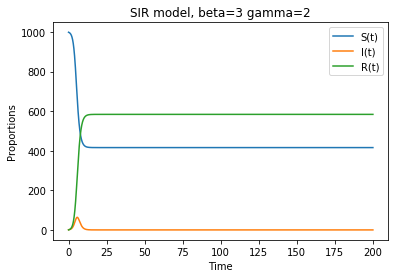

<Figure size 432x288 with 0 Axes>

In [71]:
#third set of beta and gamma
beta=3
gamma=2

t= np.linspace(0,200,10000)

#odeint used to integrate functions
solution = odeint(SIR_model,[S0,I0,R0],t,args=(beta,gamma))
solution = np.array(solution)

#plotting
plt.plot(t,solution[:,0], label="S(t)")
plt.plot(t,solution[:,1], label="I(t)")
plt.plot(t,solution[:,2], label="R(t)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SIR model, beta=3 gamma=2")
plt.show()
plt.savefig("q23")